In [1]:
from libra_toolbox.neutron_detection.activation_foils.compass import Measurement

run_dir = "250317_BABY_1L_run3/DAQ"

directories = {}
directories["Co60_1"] = f"{run_dir}/Co60_0_872uCi_19Mar2014_240317/UNFILTERED"
directories["Co60_2"] = f"{run_dir}/Co60_0_872uCi_19Mar2014_250318_run2/UNFILTERED"
directories["Co60_3"] = f"{run_dir}/Co60_0_872uCi_19Marc2014_250319_run3/UNFILTERED"
directories["Co60_4"] = f"{run_dir}/Co60_0_872uCi_19Marc2014_250320_run4/UNFILTERED"
directories["Cs137_1"] = f"{run_dir}/Cs137_9_38uCi_29Sep23_240317/UNFILTERED"
directories["Cs137_2"] = f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run2/UNFILTERED"
directories["Cs137_3"] = f"{run_dir}/Cs137_9_38uCi_29Sep2023_250318_run3/UNFILTERED"
directories["Cs137_4"] = f"{run_dir}/Cs137_9_38uCi_29Sep2023_250319_run5/UNFILTERED"
directories['Mn54_1']  = f'{run_dir}/Mn54_6_27uCi_2May2016_250318/UNFILTERED'
directories['Mn54_2']  = f'{run_dir}/Mn54_6_27uCi_2May2016_250319_run2/UNFILTERED'
directories['Mn54_3']  = f'{run_dir}/Mn54_6_27uCi_2May2016_250320_run3/UNFILTERED'
directories["Na22_1"] = f"{run_dir}/Na22_9_98uCi_29Sep23_240317/UNFILTERED"
directories["Na22_2"] = f"{run_dir}/Na22_9_98uCi_29Sep23_240317_run2/UNFILTERED"
directories["Na22_3"] = f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run3/UNFILTERED"
directories["Na22_4"] = f"{run_dir}/Na22_9_98uCi_29Sep2023_250318_run4/UNFILTERED"
directories["Na22_5"] = f"{run_dir}/Na22_9_98uCi_29Sep2023_250319_run5/UNFILTERED"

background_dir = f"{run_dir}/Background_250322/UNFILTERED"

check_source_Co60_meas = Measurement.from_directory(
    "250317_BABY_1L_run3/DAQ/Co60_0_872uCi_19Marc2014_250319_run3/UNFILTERED",
    name="test",
)

In [2]:
all_measurements = {}

for source, directory in directories.items():
    print(f"Processing {source}...")
    meas = Measurement.from_directory(directory, name=source)
    print(meas)
    all_measurements[source] = meas

print(f"Processing background...")
background_meas = Measurement.from_directory(
    background_dir,
    name="Background",
    info_file_optional=True,
)

Processing Co60_1...
No root file found, assuming all counts are live
Processing Co60_2...
Processing Co60_3...
Processing Co60_4...
Processing Cs137_1...
No root file found, assuming all counts are live
Processing Cs137_2...
Processing Cs137_3...
Processing Cs137_4...
Processing Mn54_1...
Processing Mn54_2...
Processing Mn54_3...
Processing Na22_1...
No root file found, assuming all counts are live
Processing Na22_2...
No root file found, assuming all counts are live
Processing Na22_3...
Processing Na22_4...
Processing Na22_5...
Processing background...


/home/remidm/libra-toolbox/libra_toolbox/neutron_detection/activation_foils/compass.py:284: UserWarning: run.info file not found. Assuming start and stop time are not needed.
  warnings.warn(


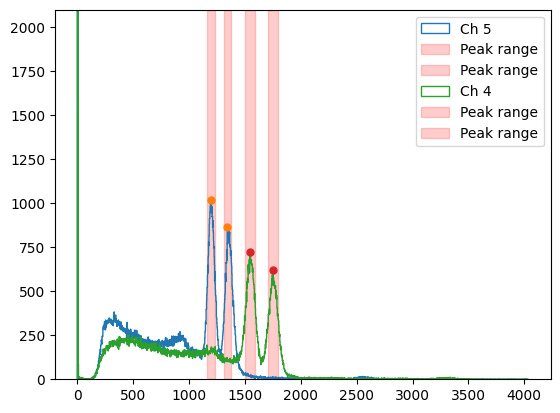

In [3]:
import matplotlib.pyplot as plt
from libra_toolbox.neutron_detection.activation_foils import peak_fitting

for detector in check_source_Co60_meas.detectors:
    hist, bin_edges = detector.get_energy_hist(bins="double")

    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist,
        histtype="step",
        label=f"Ch {detector.channel_nb}",
    )
    peaks = peak_fitting.get_peaks(hist, source="Co60_0_872uCi_19Marc2014_250319_run3")
    # plt.plot(bin_edges[peaks], hist[peaks], '.', ms=10)

    from scipy.signal import find_peaks
    import numpy as np

    start_index = 400
    height = 0.60 * np.max(hist[start_index:])
    prominence = None
    width = [10, 150]
    distance = 30
    peaks, peak_data = find_peaks(
        hist[start_index:],
        prominence=prominence,
        height=height,
        width=width,
        distance=distance,
    )
    plt.plot(bin_edges[start_index:][peaks], peak_data["peak_heights"], ".", ms=10)

    for i, p in enumerate(peaks):
        width = peak_data["widths"][i]
        plt.axvspan(
            bin_edges[start_index:][p] - width,
            bin_edges[start_index:][p] + width,
            color="red",
            alpha=0.2,
            label="Peak range",
        )

plt.legend()
# plt.yscale("log")
plt.ylim(top=2100)
plt.show()

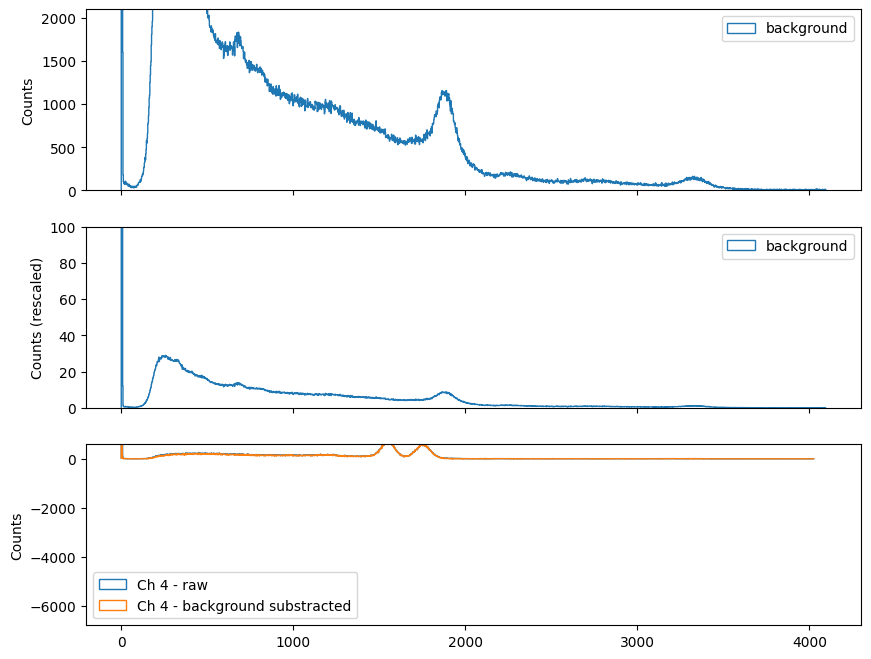

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


plt.sca(axs[0])
hist, bin_edges = background_meas.detectors[1].get_energy_hist(bins="double")

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"background",
)
plt.ylim(top=2100)
plt.ylabel("Counts")
plt.legend()

plt.sca(axs[1])


background_time = background_meas.detectors[1].real_count_time
bg_hist_scale = hist * check_source_Co60_meas.detectors[1].real_count_time / background_time 
plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=bg_hist_scale,
    histtype="step",
    label=f"background",
)
plt.ylim(top=100)
plt.ylabel("Counts (rescaled)")
plt.legend()

plt.sca(axs[2])

hist, bin_edges = check_source_Co60_meas.detectors[1].get_energy_hist(bins="double")

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - raw",
)


background_detector = background_meas.detectors[1]

hist_background_substracted, bin_edges_bg_sub = check_source_Co60_meas.detectors[1].get_energy_hist_background_substract(background_detector, bins="double")

plt.hist(
    bin_edges_bg_sub[:-1],
    bins=bin_edges_bg_sub,
    weights=hist_background_substracted,
    histtype="step",
    label=f"Ch {detector.channel_nb} - background substracted",
)
plt.ylabel("Counts")

plt.legend()
# plt.yscale("log")
plt.ylim(top=600)
plt.show()

/tmp/ipykernel_865648/2939631474.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


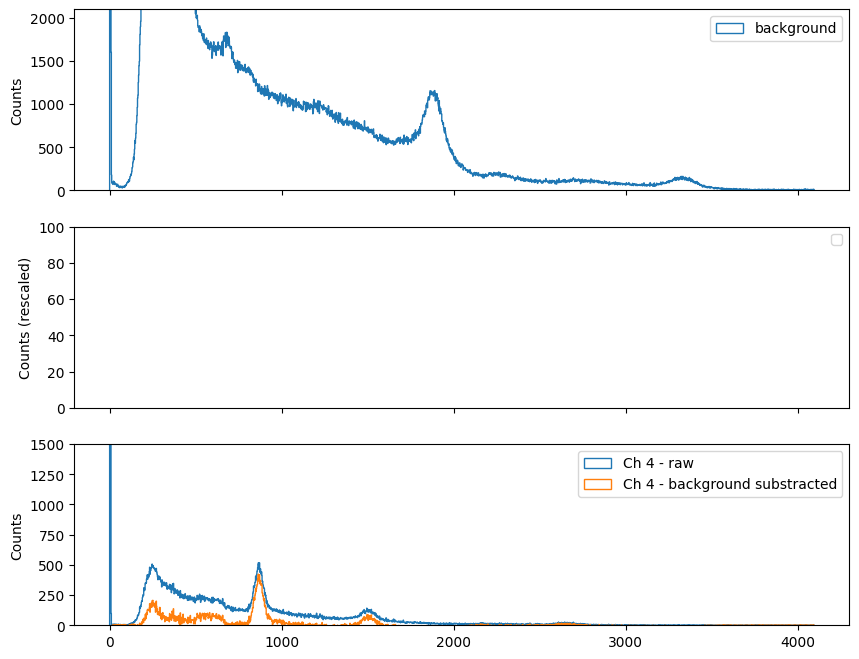

In [5]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)


plt.sca(axs[0])
hist, bin_edges = background_meas.detectors[1].get_energy_hist(bins="double")

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"background",
)
plt.ylim(top=2100)
plt.ylabel("Counts")
plt.legend()

plt.sca(axs[1])


# background_time = background_meas.detectors[1].real_count_time
# bg_hist_scale = hist * all_measurements["Mn54_1"].detectors[1].real_count_time / background_time 
# plt.hist(
#     bin_edges[:-1],
#     bins=bin_edges,
#     weights=bg_hist_scale,
#     histtype="step",
#     label=f"background",
# )
plt.ylim(top=100)
plt.ylabel("Counts (rescaled)")
plt.legend()

plt.sca(axs[2])

hist, bin_edges = all_measurements["Mn54_1"].detectors[1].get_energy_hist(bins="double")

plt.hist(
    bin_edges[:-1],
    bins=bin_edges,
    weights=hist,
    histtype="step",
    label=f"Ch {detector.channel_nb} - raw",
)


background_detector = background_meas.detectors[1]

hist_background_substracted, bin_edges_bg_sub = all_measurements["Mn54_1"].detectors[1].get_energy_hist_background_substract(background_detector, bins="double")

plt.hist(
    bin_edges_bg_sub[:-1],
    bins=bin_edges_bg_sub,
    weights=hist_background_substracted,
    histtype="step",
    label=f"Ch {detector.channel_nb} - background substracted",
)
plt.ylabel("Counts")

plt.legend()
# plt.yscale("log")
plt.ylim(bottom=0, top=1500)
plt.show()

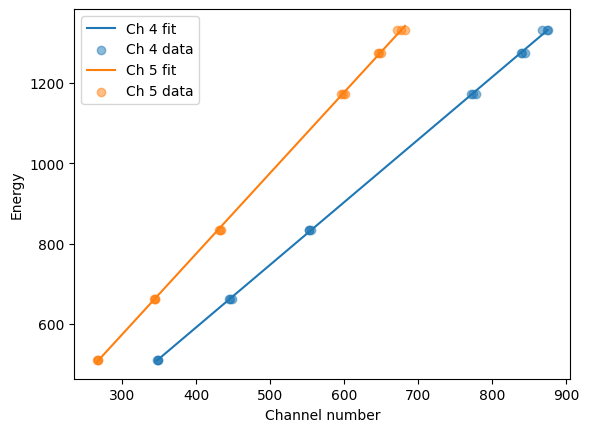

In [10]:
from libra_toolbox.neutron_detection.activation_foils.calibration import get_decay_lines

decay_lines = get_decay_lines(["Co60", "Cs137", "Mn54", "Na22"])


for channel_nb in [4, 5]:
    calibration_channels, calibration_energies = peak_fitting.get_calibration_data(
        all_measurements,
        background_measurement=background_meas,
        decay_lines=decay_lines,
        channel_nb=channel_nb,
    )

    coeff = np.polyfit(calibration_channels, calibration_energies, 1)

    xs = np.linspace(
        calibration_channels[0],
        calibration_channels[-1],
    )
    plt.plot(
        xs,
        np.polyval(coeff, xs),
        label=f"Ch {channel_nb} fit",
    )
    plt.scatter(
        calibration_channels,
        calibration_energies,
        label=f"Ch {channel_nb} data",
        alpha=0.5,
    )
plt.xlabel("Channel number")
plt.ylabel("Energy")
plt.legend()
plt.show()
